In [100]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [101]:
#check file encoding
import chardet
with open('takehome_users.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

In [102]:
#load user file
tkhmUser=pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')

In [103]:
tkhmUser.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [104]:
#load user engagement file
engUser=pd.read_csv('takehome_user_engagement.csv',encoding='ISO-8859-1')

In [105]:
engUser.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [106]:
engUser.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [107]:
engUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [108]:
engUser.nunique(axis=0,dropna=True)

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [109]:
tkhmUser.nunique(axis=0,dropna=True)

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [110]:
tkhmUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


The number of unique entries for a user is different for the 2 tables.

The first step is to create a 1 or 0 classification for 'adopted_user' Yes or no.

In [111]:
count=0
line=[]
timestamplist=[]
adopted_user_list=[]
for index, row in engUser.iterrows():
    count=count+1
    line=row
print(count)
print(line)

207917
time_stamp    2014-01-26 08:57:12
user_id                     12000
visited                         1
Name: 207916, dtype: object


In [112]:
line.time_stamp

'2014-01-26 08:57:12'

In [113]:
duplicateRowsDF = engUser[engUser.duplicated()]
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time_stamp  0 non-null      object
 1   user_id     0 non-null      int64 
 2   visited     0 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 0.0+ bytes


No duplicated rows

In [114]:
user_value=engUser['user_id'].value_counts()

In [115]:
adopted_list=[]

for index, value in user_value.items():
    if value>2:
        adopted_list.append(index)



In [116]:
print('Number of adopted users is', len(adopted_list))

Number of adopted users is 2248


In [117]:
#Finding these users in the tkhmUser dataframe
#Note user_id in engUser is assumed to be tkhmUser

In [118]:
tkhmUser['adopted_user']=0

In [119]:
tkhmUser['object_id'].loc[1]

2

In [120]:
for index, row in tkhmUser.iterrows():
    if tkhmUser['object_id'].loc[index] in adopted_list:
        tkhmUser['adopted_user'].loc[index]=1

        
    

/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [121]:
tkhmUser.nunique(axis=0,dropna=True)

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
adopted_user                      2
dtype: int64

In [122]:
tkhmUser.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04
adopted_user,12000.0,1.873333e-01,3.901951e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [123]:
#import modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [124]:
tkhmUser.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user'],
      dtype='object')

In [125]:
features = ['creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
features = ['creation_source',
        'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']

In [126]:
features = ['creation_source',
        'opted_in_to_mailing_list',
       'enabled_for_marketing_drip']

In [127]:
# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = tkhmUser[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = tkhmUser.adopted_user

In [142]:
X['creation_source']=X['creation_source'].replace('GUEST_INVITE',0.0)
X['creation_source']=X['creation_source'].replace('ORG_INVITE',1.0)
X['creation_source']=X['creation_source'].replace('SIGNUP',2.0)
X['creation_source']=X['creation_source'].replace('PERSONAL_PROJECTS',3.0)
X['creation_source']=X['creation_source'].replace('SIGNUP_GOOGLE_AUTH',4.0)

/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [143]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

In [129]:
cs = X['creation_source'].unique()
print(cs)

['GUEST_INVITE' 'ORG_INVITE' 'SIGNUP' 'PERSONAL_PROJECTS'
 'SIGNUP_GOOGLE_AUTH']


In [130]:
optmail = X['opted_in_to_mailing_list'].unique()
print(optmail)

[1 0]


In [131]:
optmail = X['enabled_for_marketing_drip'].unique()
print(optmail)

[0 1]


/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [140]:
cs = X['creation_source'].unique()
print(cs)

[0. 1. 2. 3. 4.]


In [137]:
tkhmUser['adopted_user'] = tkhmUser['adopted_user'].replace(1.0, "YES")
tkhmUser['adopted_user'] = tkhmUser['adopted_user'].replace(0.0, "NO")

In [138]:
y = tkhmUser.adopted_user

In [144]:
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 1234)
firstRFModel.fit(X_train, y_train)
y_pred = firstRFModel.predict(X_test)
Y_pred = pd.Series(y_pred)
firstRFModel

/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [145]:
from sklearn import tree, metrics

In [146]:
print("FirstRF  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

FirstRF  model - max depth 3
Accuracy: 0.819
Balanced accuracy: 0.5
Precision score 0.0
Recall score 1.0


/Users/suhas/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [147]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
Y_pred = pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

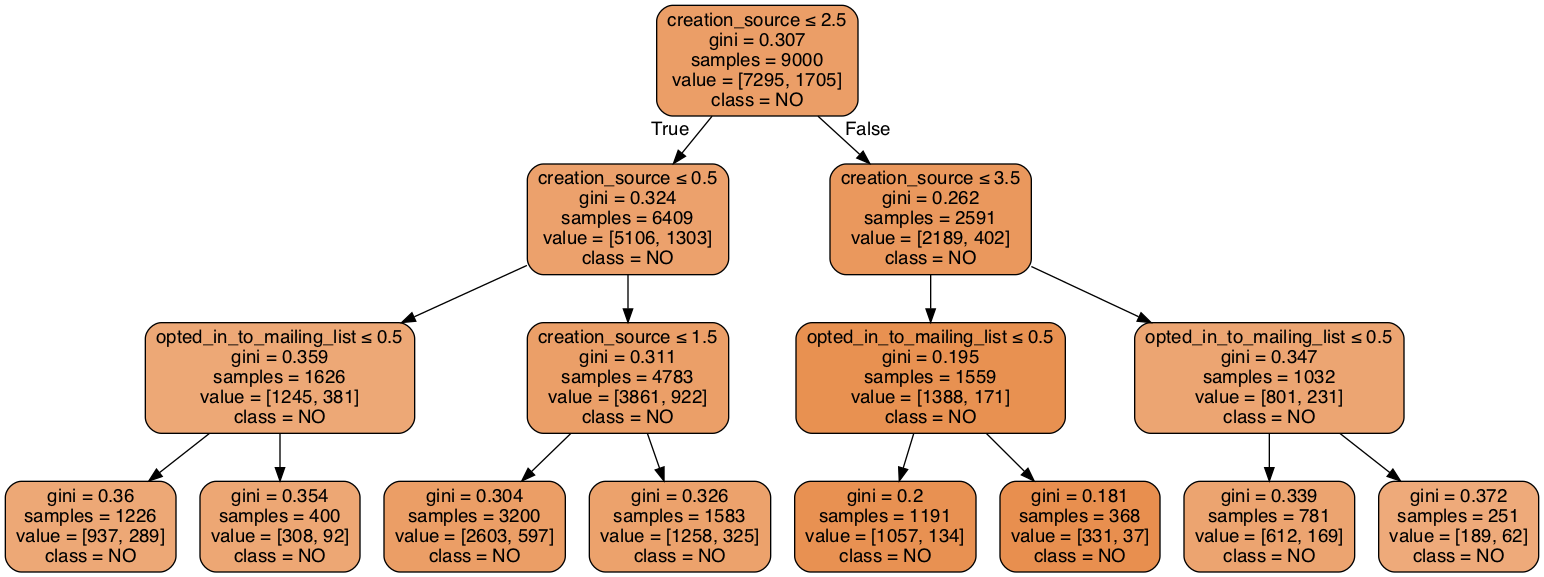

In [148]:
from sklearn.externals.six import StringIO 
import pydotplus
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())